<a href="https://colab.research.google.com/github/AlexTran1703/Intro_Machine_Learning/blob/Lab1_Intro-to-Google-Colab/Lab1_pro3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


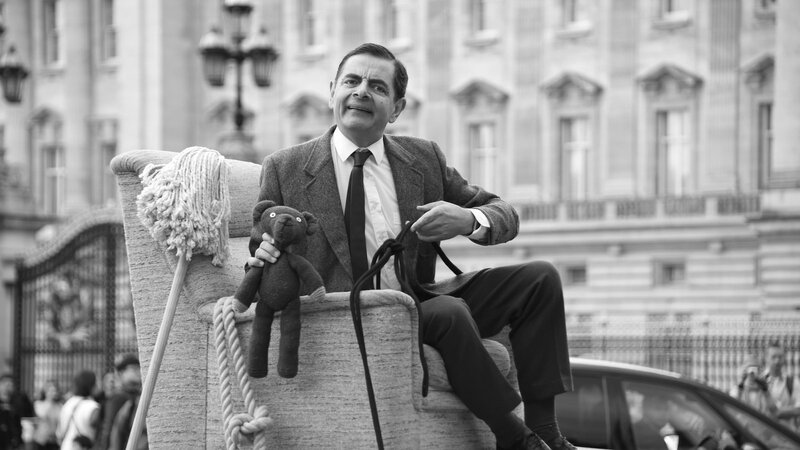

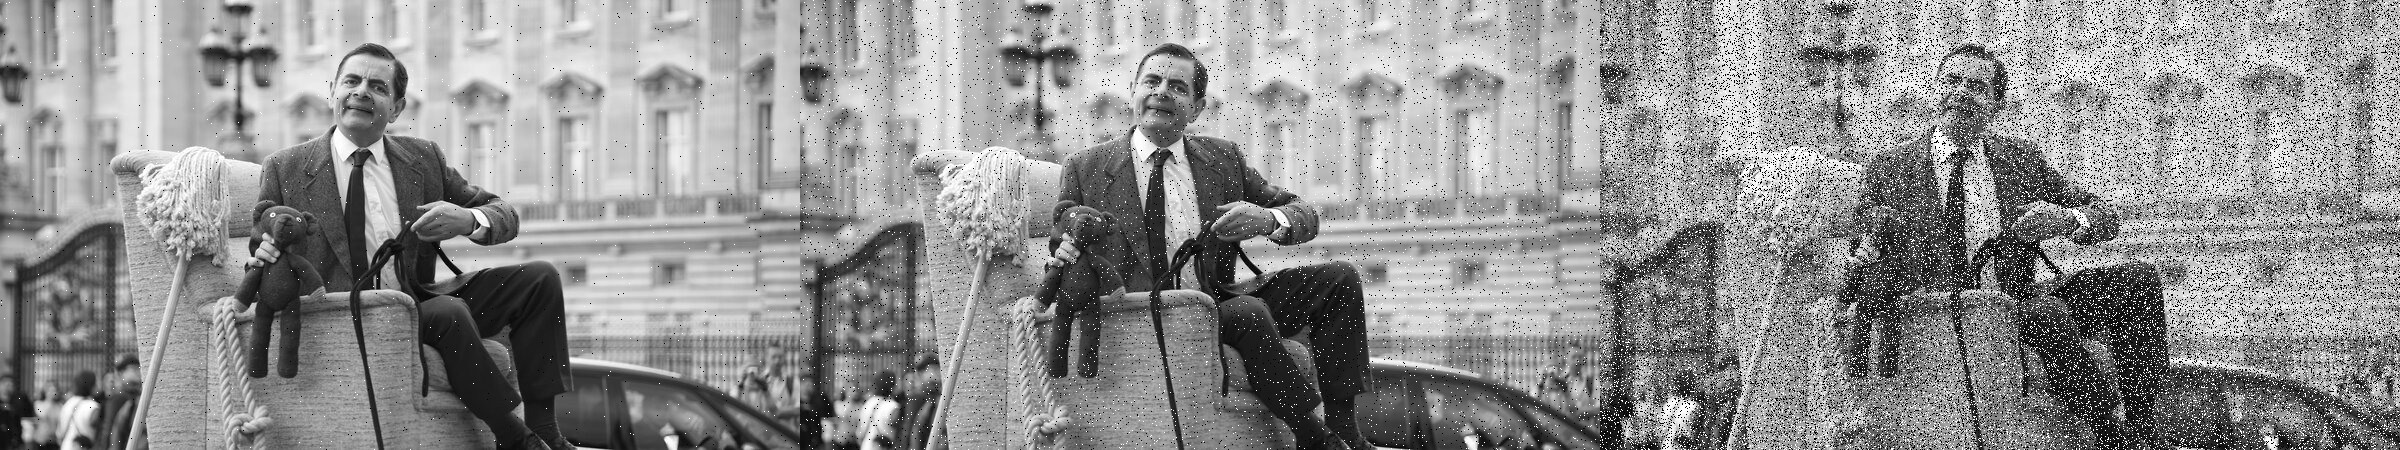

In [ ]:
#Lab 1 Problem 3 a
import cv2
import random
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive 
drive.mount('/content/drive/')

image_path = '/content/drive/MyDrive/Colab Notebooks/Colab_data/mrbean.jpg'
#Read image 
image = cv2.imread(image_path,0)

#Define noise function
def add_noise(image, density):
    """The Function add noise to image 'img' based 'density' of the noise """
    # Getting the dimensions of the image
    row , col = image.shape
    #Copy the image
    new_img = image.copy()
    # Randomly pick some pixels in the
    # image for coloring them white
    for i in range(density):
      # Pick a x coordinate
      x=random.randint(0, row - 1)

      # Pick a y coordinate
      y=random.randint(0, col - 1)

      # Color that pixel to white
      new_img[x][y] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    for j in range(density):
      # Pick a x coordinate
      x=random.randint(0, row - 1)
         
      # Pick a y coordinate
      y=random.randint(0, col - 1)
         
      # Color that pixel to black
      new_img[x][y] = 0
         
    return new_img

cv2_imshow(image)
image1 = add_noise(image,500)
image2 = add_noise(image,5000)
image3 = add_noise(image,50000)

image_stack = np.concatenate((image1, image2, image3), axis=1)

cv2_imshow(image_stack)

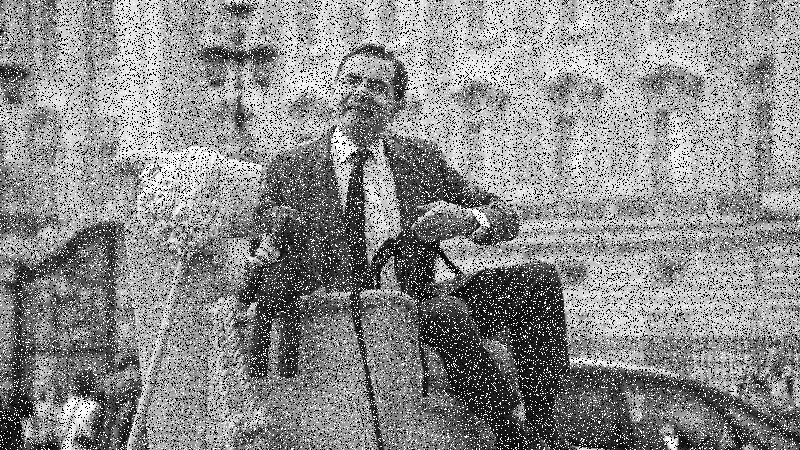

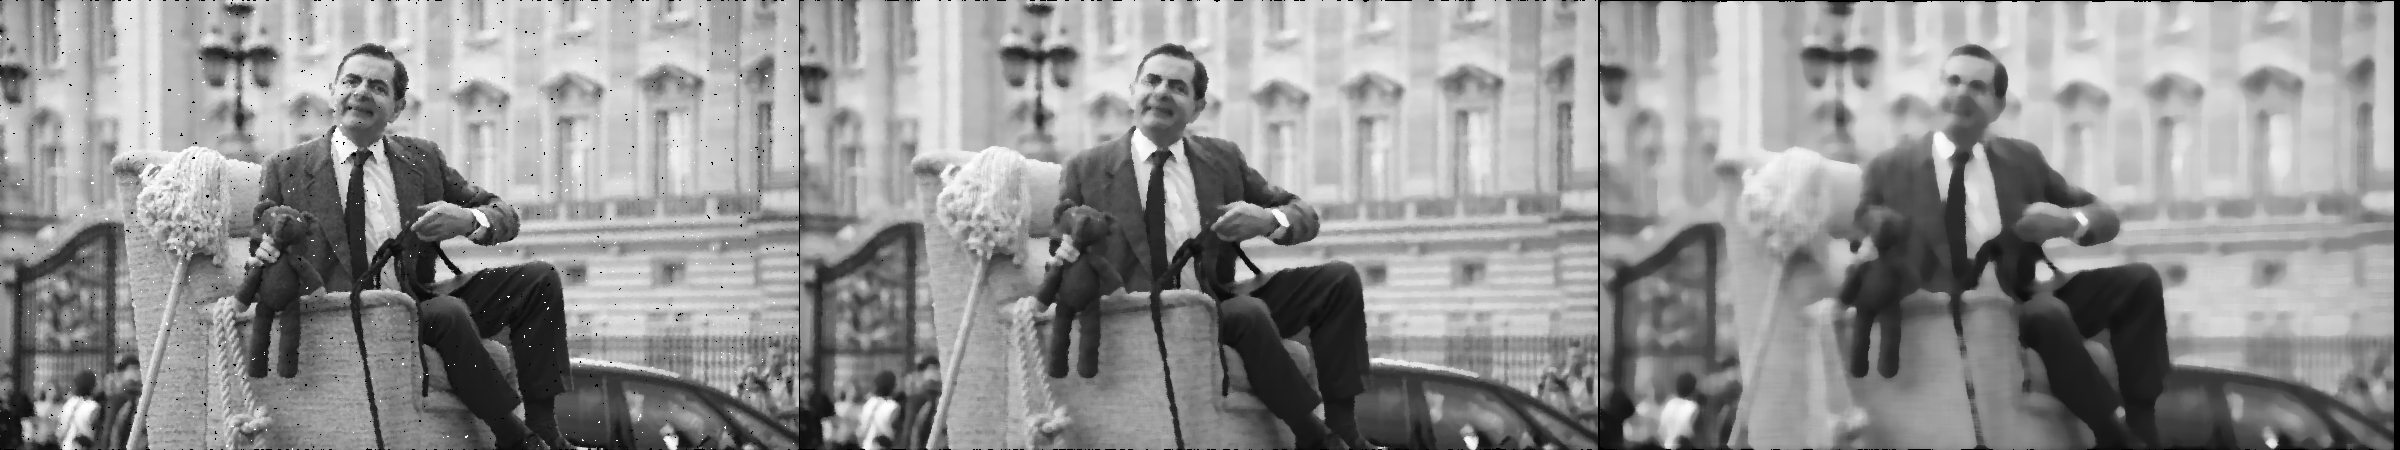

In [ ]:
#Lab 1 Problem 3 b
import numpy as np

def median_filter(image, size_ker):
    temp = []
    indexer = size_ker // 2
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):

        for j in range(image.shape[1]):

            for z in range(size_ker):
                if i + z - indexer < 0 or i + z - indexer > image.shape[0] - 1:
                    for c in range(size_ker):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > image.shape[1] - 1:
                        temp.append(0)
                    else:
                        for k in range(size_ker):
                            temp.append(image[i + z - indexer][j + k - indexer])

            temp.sort()
            new_image[i][j] = temp[len(temp) // 2]
            temp = []
    return new_image

img_ker3 = median_filter(image3, 3)
img_ker5 = median_filter(image3, 5)
img_ker12 = median_filter(image3, 12)

image_stack = np.concatenate((img_ker3, img_ker5, img_ker12), axis=1)

cv2_imshow(image3)
cv2_imshow(image_stack)